In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [4]:
csv_path = "/content/product.csv"
df_csv = pd.read_csv(csv_path)
print("CSV Preview:\n", df_csv.head())

CSV Preview:
    Transaction_ID        Date     Product     Category  Customer_Age Region  \
0               1  01-01-2024  Headphones  Accessories            58   West   
1               2  02-01-2024  Smartwatch  Accessories            32   East   
2               3  03-01-2024      Tablet  Electronics            65   East   
3               4  04-01-2024  Smartwatch  Accessories            57   East   
4               5  05-01-2024  Smartwatch  Electronics            33   West   

   Quantity  Unit_Price  Total_Sales  
0         2         520         1040  
1         4         791         3164  
2         1         783          783  
3         4        1047         4188  
4         1         380          380  


In [5]:
# Step 2: Save to SQLite DB
conn = sqlite3.connect("sales_data.db")
df_csv.to_sql("sales", conn, if_exists="replace", index=False)

10000

In [11]:
# Step 3: SQL Query to Summarize Sales
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * Unit_Price), 2) AS revenue
FROM sales
GROUP BY product
"""

In [12]:
df_summary = pd.read_sql_query(query, conn)
print("\nSales Summary:\n", df_summary)


Sales Summary:
       Product  total_qty    revenue
0  Headphones       5001  3778036.0
1      Laptop       5193  3980796.0
2  Smartphone       4964  3781722.0
3  Smartwatch       5042  4038680.0
4      Tablet       4796  3711428.0


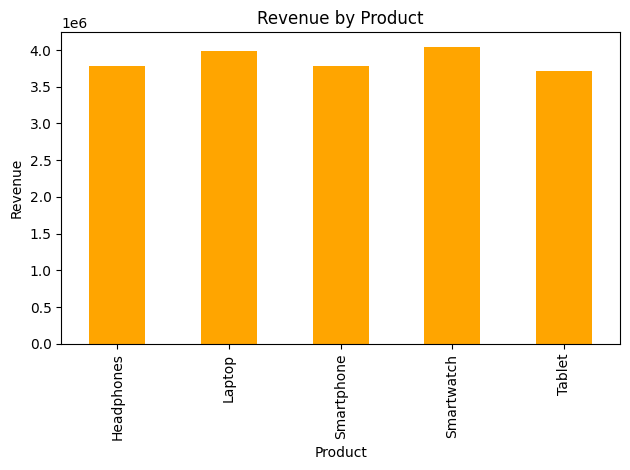

In [14]:
df_summary.plot(kind='bar', x='Product', y='revenue', legend=False, color='orange')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional
plt.show()

conn.close()